In [1]:
#import spacy
import nltk
nltk.download('punkt')
#nltk.download("gutenberg")
#from nltk.corpus import gutenberg
import requests
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yuru\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [421]:
#nlp = spacy.load('en')
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy import displacy

In [326]:
def read_books(url):
  r = requests.get(url)
  # What comes back includes headers and other HTTP stuff, get just the body of the response
  t = r.text
  return t


#save all the books
the_extra_ordinary_adv_lupin = 'https://www.gutenberg.org/files/6133/6133-0.txt'
arsene_lupin = 'https://www.gutenberg.org/cache/epub/4014/pg4014.txt'
lupin_vs_herlock_sholmes = 'https://www.gutenberg.org/files/40203/40203-0.txt'
the_hollow_needle = 'https://www.gutenberg.org/files/4017/4017-0.txt'
the_confession_of_lupin = 'https://www.gutenberg.org/cache/epub/28093/pg28093.txt'


#read all the books one by one

book1 = read_books(the_extra_ordinary_adv_lupin)
book2 = read_books(arsene_lupin)
book3 = read_books(lupin_vs_herlock_sholmes)
book4 = read_books(the_hollow_needle)
book5 = read_books(the_confession_of_lupin)

book_list=[book1,book2,book3,book4,book5]

In [327]:
# Answers for question 1-6
Q1_list=[None]*5
Q2_list=[None]*5
Q3_list=[None]*5
Q4_list=[None]*5
Q5_list=[None]*5
Q6_list=[None]*5

In [426]:
book_index = 3
text = book_list[book_index-1]

In [427]:
# divide chapter function1
def chapter_divider1(text):
    Roman_numeric = ["I","II","III","IV","V","VI","VII","VIII","IX","X",
                 "XI","XII","XIII","XIV","XV","XVI","XVII","XVIII","XIX","XX",
                 "XXI","XXII","XXIII","XXIV","XXV","XXVI","XXVII","XXVIII","XXIX","XXX",
                 "XXXI","XXXII","XXXIII","XXXIV","XXXV","XXXVI","XXXVII","XXXVIII","XXXIX","XL",
                ]

    chapter_list1 = []
    for i in range(0,len(Roman_numeric)-1):
        Rn1=Roman_numeric[i]
        Rn2=Roman_numeric[i+1]
        #print(Rn1,Rn2)
        pattern="\s"+Rn1+"\."+".*[\.\w\s\r\n]*?"+Rn2+"\.\s"
        match = re.search(pattern, text) 

        if match:
    #         print(match.group())
    #         print(match.start())
#             print(match.end())
            last_end=match.end()
            pattern="(?<="+Rn1+"\.)"+".*(?=\r)"
            result=re.findall(pattern, match.group())
            #print(result[0])
            pattern="(?<=\s)\w.*"
            result=re.findall(pattern, result[0])
            pattern="(\s){3,}"
            match=re.search(pattern, result[0])
            if match:
                result[0]=result[0][0:match.start()]
#             print(result[0])
            chapter_list1.append(result[0])
        else:
            pattern="(?<="+Rn1+"\.)"+".*(?=\r)"
#             print(text[last_end-10:last_end+80])
            result=re.findall(pattern, text[last_end-10:last_end+100])
            if result:
#                 print(result[0])
                pattern="(?<=\s)\w.*"
                result=re.findall(pattern, result[0])
                pattern="(\s){3,}"
                match=re.search(pattern, result[0])
                if match:
                    result[0]=result[0][0:match.start()]
                chapter_list1.append(result[0])
            break
            #print("pattern not found")
    
    print("list1:",len(chapter_list1),chapter_list1)
    return(chapter_list1)


#chapter_list1=chapter_divider1(book1)

# divide chapter function2
def chapter_divider2(text):
    chapter_list2 = []
    pattern="[IVX]\.[\s\r\n]+"+".*(?=\r)"
    result=re.findall(pattern, text)
    #print(result)
    #print(len(result))

    chapter_count=len(result)
    
    position_list=[]
    
    for r in result:
        #print(r)
        match=re.search(r, text)
        if match:
            position=match.end()
            position_list.append(position)
        else:
            position_list.append(0)
    
    for i in range(0,len(result)):
        if abs(position_list[i+1]-position_list[i])<100:
            r=result[i]
            pattern="(?<=\s)\w.*"
            new_r=re.findall(pattern, r)
            pattern="(\s){3,}"
            match=re.search(pattern, new_r[0])
            if match:
                new_r[0]=new_r[0][0:match.start()]
            if (new_r[0] in chapter_list2):
                break
            else:
                chapter_list2.append(new_r[0])
        else:
            r=result[i]
            pattern="(?<=\s)\w.*"
            new_r=re.findall(pattern, r)
            pattern="(\s){3,}"
            match=re.search(pattern, new_r[0])
            if match:
                new_r[0]=new_r[0][0:match.start()]
            if (new_r[0] in chapter_list2):
                break
            else:
                chapter_list2.append(new_r[0])
            break
    
    
    #print(position_list)
    
    print("list2:",len(chapter_list2),chapter_list2)
    
    return(chapter_list2)
    

#chapter_list2=chapter_divider2(book1)
#print(len(chapter_list))

def chapter_divider(text):
    chapter_list1=chapter_divider1(text)
    chapter_list2=chapter_divider2(text)
    
    correct_flag_short=True
    
    for i in range(0,min(len(chapter_list1),len(chapter_list2))):
        if chapter_list1[i] != chapter_list2[i]:
            correct_flag_short=False
            
    if correct_flag_short:
        if len(chapter_list1)<len(chapter_list2):
            correct_flag_long = chapter_check(chapter_list1,chapter_list2)
        else:
            correct_flag_long = chapter_check(chapter_list2,chapter_list1)
    else:
        return("wrong list")
        
    if correct_flag_long:
        print("Correct:",len(chapter_list2),chapter_list2)
        return(chapter_list2)
    else:
        print("Correct:",len(chapter_list1),chapter_list1)
        return chapter_list1

def chapter_check(chapter_short,chapter_long):
    correct_flag = True
    for i in range(len(chapter_short),len(chapter_long)):
        chaptername_check = chapter_long[i]
        print(chaptername_check)
        for chaptername in chapter_short:
            
            Uppercheck1 = (chaptername_check.upper() in chaptername.upper())
            Uppercheck2 = (chaptername.upper() in chaptername_check.upper())
            Uppercheck  = Uppercheck1 | Uppercheck2
            Lowercheck1 = (chaptername_check.lower() in chaptername.lower())
            Lowercheck2 = (chaptername.lower() in chaptername_check.lower())
            Lowercheck  = Lowercheck1 | Lowercheck2
#             print(chaptername_check.upper(),chaptername.upper(),Uppercheck)
#             print(chaptername_check.lower(),chaptername.lower(),Lowercheck)
            if Uppercheck | Lowercheck :
                correct_flag = False
                break
    
    return correct_flag 
        
#chapter_divider(book3)

In [428]:
#identify text in each chapter
def chapter_text_find(text):
    chapter_list=chapter_divider(text)
    
    chapter_text=[]
    chapter_count=len(chapter_list)
    chapter_name = chapter_list[chapter_count-1]
    match = re.search(chapter_name, text) 
    n_text=text[match.end():len(text)]

    span_list=[]
    for i in range(0,chapter_count):
        chapter_name=chapter_list[i]
        pattern="[^a-zA-Z\s]"
        chapter_name_clear=re.sub(pattern, ".",chapter_name)
        normal_flag = False
        upper_flag = False
        match_normal = re.search(chapter_name_clear, n_text) 
        match_upper = re.search(chapter_name_clear.upper(), n_text)
        if match_normal:
            match = match_normal
            normal_flag = True
        if match_upper:
            match = match_upper
            upper_flag = True
        if (normal_flag & upper_flag):
            if match_normal.end()<match_upper.end():
                match = match_normal
            else:
                match = match_upper
        
        print(chapter_name_clear)
        print(match.group())
        print(match.span())
        
        span_list.append(match.span())
    span_list.append([len(n_text),len(n_text)])
    print(span_list)
    for i in range(0,chapter_count):
        textinchapter=n_text[span_list[i][1]:span_list[i+1][0]]
        chapter_text.append(textinchapter)
    print("Chapter text number:",len(chapter_text))
    return chapter_text



#get chapter_text
chapter_text=chapter_text_find(text)

list1: 8 ['Lottery Ticket No. 514', 'The Blue Diamond', 'Herlock Sholmes Opens Hostilities', 'Light in the Darkness', 'An Abduction', 'Second Arrest of ArsÃ¨ne Lupin', 'The Jewish Lamp', 'The Shipwreck']
list2: 9 ['Lottery Ticket No. 514', 'The Blue Diamond', 'Herlock Sholmes Opens Hostilities', 'Light in the Darkness', 'An Abduction', 'Second Arrest of ArsÃ¨ne Lupin', 'The Jewish Lamp', 'The Shipwreck', 'LOTTERY TICKET NO. 514.']
LOTTERY TICKET NO. 514.
Correct: 8 ['Lottery Ticket No. 514', 'The Blue Diamond', 'Herlock Sholmes Opens Hostilities', 'Light in the Darkness', 'An Abduction', 'Second Arrest of ArsÃ¨ne Lupin', 'The Jewish Lamp', 'The Shipwreck']
Lottery Ticket No. ...
LOTTERY TICKET NO. 514
(22, 44)
The Blue Diamond
THE BLUE DIAMOND
(47159, 47175)
Herlock Sholmes Opens Hostilities
HERLOCK SHOLMES OPENS HOSTILITIES
(92181, 92214)
Light in the Darkness
LIGHT IN THE DARKNESS
(135763, 135784)
An Abduction
AN ABDUCTION
(175182, 175194)
Second Arrest of Ars..ne Lupin
SECOND ARREST

In [429]:
# sentence divider function
def sentence_divider(text):
    ellipsis = "(\.\.\.+)"
    temp_text = re.sub(ellipsis,"^",text)
    M = "M\."
    M_temp = "M&"
    Mr = "Mr\."
    Mr_temp = "Mr&"
    Mme = "Mme\."
    Mme_temp = "Mme&"
    Mlle = "Mlle."
    Mlle_temp = "Mlle&"
    temp_text = re.sub(M,M_temp,temp_text)
    temp_text = re.sub(Mr,Mr_temp,temp_text)
    temp_text = re.sub(Mme,Mme_temp,temp_text)
    temp_text = re.sub(Mlle,Mlle_temp,temp_text)
    special_quote1 = book3[1761:1764]
    temp_text=re.sub(special_quote1,'"',temp_text)
    special_quote2 = book3[1761+29:1764+29]
    temp_text=re.sub(special_quote2,"'",temp_text)
    special_quote3 = book3[1761+51:1764+51]
    temp_text=re.sub(special_quote3,'"',temp_text)
    
    pattern = ""
    mid_puncatuation="[\w,:;'\"\\s\-_\[\]\(\)\&\^\%©]+"
    # "....."
    pattern = pattern+"(\\s+\"+"+mid_puncatuation+"[:.?!]+(\^)?\"(?=\\s))"
    # .....
    pattern = pattern+"|(\\s+"+mid_puncatuation+"[.?!]+(\^)?(?=\\s))"
    # ".....
    pattern = pattern+"|(\\s+\"+"+mid_puncatuation+"[:.?!]+(\^)?(?=\\s))"
    # ....."
    pattern = pattern+"|(\\s+"+mid_puncatuation+"[:.?!]+(\^)?\"(?=\\s))"
    sentence_find = re.findall(pattern, temp_text) 
    line_number=0
    sentence_result = []
    for sent in sentence_find:
        line_number=line_number+1
        #print(line_number)
        len_sent = 0
        for s in sent:
            if(len(s)>len_sent):
                len_sent=len(s)
                sent_sub=s
            
        sent_sub=re.sub(r'[\r\n]+',' ',sent_sub)
        sent_sub=re.sub("\^","...",sent_sub)
        sent_sub=re.sub("M\&","M.",sent_sub)
        sent_sub=re.sub("Mr\&","Mr.",sent_sub)
        sent_sub=re.sub("M\&","Mme.",sent_sub)
        sent_sub=re.sub("Mlle\&","Mlle.",sent_sub)
        #print(sent_sub)
        sentence_result.append(sent_sub)
    return sentence_result

#chapter=chapter_text[0]
#sentence_result=sentence_divider(chapter)
#print(sentence_result)

In [430]:
# search Name

#test_sentence=sentence_nltk[]
class entities:
    def __init__(self, name, count,position,label):
        self.name = name
        self.count = count
        self.position = [position]
        self.label = label
    def addonce(self,position):
        self.count = self.count + 1
        self.position.append(position)



pattern="(?<!^)[A-Z][\w©-]+(?=\\s)"
# pattern = "[A-Z]"+"([a-z]+|\.)"
# pattern = "[A-Z]([a-z]+|\.)(?:\s+[A-Z]([a-z]+|\.))*(?:\s+[a-z][a-z\-]+){0,2}\s+[A-Z]([a-z]+|\.)"
chapter_number=0
entities_list=[]
entities_count=[]
entities_objects=[]
sentence_total = []
for chapter in chapter_text:
    linenumber = 0
    chapter_number = chapter_number+1
    print(chapter_number)
    sentence = sentence_divider(chapter)
    sentence_total.append(sentence)
    for sent in sentence:
        linenumber = linenumber +1
        match=re.findall(pattern, sent)
        if match:
            #print(sent)
            #print(match)
            for temp_ent in match:
                if (temp_ent in entities_list):
                    ent_index=entities_list.index(temp_ent)
                    entities_count[ent_index]=entities_count[ent_index]+1
                    position = [chapter_number,linenumber]
                    if position not in entities_objects[ent_index].position:
                        entities_objects[ent_index].addonce(position)
                else:
                    entities_list.append(temp_ent)
                    entities_count.append(1)
                    position = [chapter_number,linenumber]
                    entities_objects.append(entities(temp_ent,1,position,""))

# print(entities_list)                                        
# print(entities_count)                                        
entities_objects_sorted=sorted(entities_objects, key=lambda entities: entities.count, reverse=True)



1
2
3
4
5
6
7
8


In [431]:
#top 25 characters
topnum = 200
top_entities_objects=[]
top_count=0
for i in range(0,len(entities_objects_sorted)):
    if(entities_objects_sorted[i].label != "CARDINAL")&(entities_objects_sorted[i].label != "ORDINAL"):
        top_entities_objects.append(entities_objects_sorted[i])
        top_count = top_count+1
    if top_count == topnum:
        break
    

#top_entities_objects = entities_objects_sorted[0:25]
print("Name, Count, First appear Chapter-Sentence, Label")
for i in range(0,topnum):
    print(top_entities_objects[i].name,top_entities_objects[i].count,
          top_entities_objects[i].position[0],top_entities_objects[i].label)

Name, Count, First appear Chapter-Sentence, Label
The 354 [1, 31] 
He 273 [1, 34] 
Sholmes 227 [2, 564] 
Lupin 208 [1, 171] 
And 151 [1, 4] 
It 149 [1, 6] 
Monsieur 140 [1, 9] 
But 128 [1, 10] 
You 115 [1, 139] 
What 107 [1, 106] 
Ganimard 86 [1, 392] 
That 79 [1, 38] 
They 75 [1, 42] 
Then 74 [1, 82] 
She 73 [1, 36] 
At 72 [1, 41] 
Herlock 69 [1, 165] 
In 67 [1, 19] 
Wilson 54 [3, 142] 
There 48 [1, 73] 
Madame 41 [1, 306] 
Do 38 [1, 240] 
Gerbois 36 [1, 9] 
If 36 [1, 144] 
Englishman 36 [2, 577] 
Project 36 [8, 758] 
How 34 [1, 395] 
Is 33 [1, 247] 
Baron 33 [2, 1] 
My 32 [1, 74] 
One 32 [1, 390] 
When 31 [1, 58] 
Mademoiselle 30 [1, 657] 
For 29 [1, 140] 
We 29 [1, 335] 
Gutenberg-tm 29 [8, 758] 
Of 28 [1, 132] 
No 28 [1, 276] 
After 27 [1, 465] 
On 26 [1, 1] 
This 26 [1, 195] 
As 24 [1, 5] 
Did 24 [1, 11] 
His 24 [1, 258] 
Jewish 23 [7, 218] 
To 22 [1, 37] 
Let 22 [1, 211] 
Very 22 [1, 340] 
Destange 21 [4, 164] 
Who 20 [1, 308] 
Are 20 [1, 444] 
Lady 20 [2, 207] 
Two 19 [1, 81] 
Y

In [432]:
print()

In [433]:
# define character
protagonist="Lupin"

if book_index==3:
    character_list=["Lupin","Ganimard","Wilson","Gerbois","Herlock","Sholmes",
                    "Englishman","Jewish","Monsieur","Clotilde","Bresson",
                    "Charles","Mademoiselle","Suzanne","Baron","Antoinette",
                    "Bleichen","Madame","Destange"
                   ]

#book4 characters
if book_index==4:
    character_list=["Beautrelet","Lupin","Ganimard","Isidore","ValmÃ©ras",
                    "Filleul","Mlle","LycÃ©e","Norman","BrÃ©doux","Marie",
                    "Dieppe","Raymonde","Jean","Louis","Saint-VÃ©ran","Don",
                    "Larbeyrie",
                    "Suzanne","Maurice","FrÃ©fossÃ©","Albert","Gaffer",
                    "Holmlock"
                   ]

#book5 characters
if book_index==5:
    character_list=["Lupin","Ganimard","Gutenberg","Dugrival","Mme",
                   "Yvonne","Gabriel","Jeanne","Darcieux","Dudouis",
                    "Goussot","Sparmiento","Angélique","Mlle","Jove",
                    "Maître","Valandier","Louise","Ernemont","Jeanniot",
                    "Lavernoux","Charles","Trainard","Jenny","Saphir",
                    "Emboise","Velmont","Boulevard"
                   ]

character_object_list=[]

for character in character_list:
    mark = True
    for ent in entities_objects_sorted:
        if character == ent.name:
            character_object_list.append(ent)
            #print(character+" found")
            mark = False
            break
    if mark:
        print(character+" not found")

#character_object_list=top_entities_objects

In [434]:
# find character behavior except Lupin
#book4, book5

for character in character_object_list:
    if (protagonist in character.name):
        if 'protagonist_ent' in locals():
            protagonist_ent.position = protagonist_ent.position + character.position
        else:
            protagonist_ent = entities(protagonist,character.count,character.position,"")
    else:
        print(character.name)
        print(character.position)
        for position in character.position:
            sent = sentence_total[position[0]-1][position[1]-1]
            print(position)
            print(sent)
    

Ganimard
[[1, 392], [1, 405], [1, 422], [1, 532], [1, 628], [1, 665], [1, 687], [1, 691], [1, 705], [1, 736], [1, 756], [2, 149], [2, 160], [2, 181], [2, 201], [2, 233], [2, 291], [2, 302], [2, 343], [2, 366], [2, 421], [2, 440], [2, 459], [2, 491], [2, 494], [2, 499], [2, 504], [2, 529], [2, 530], [2, 532], [3, 62], [3, 65], [3, 289], [4, 199], [4, 387], [4, 401], [4, 403], [4, 404], [4, 410], [4, 419], [4, 504], [4, 522], [5, 18], [5, 34], [5, 148], [5, 151], [5, 395], [5, 519], [6, 228], [6, 247], [6, 341], [6, 342], [6, 363], [6, 407], [6, 410], [6, 460], [6, 556], [6, 585], [6, 591], [6, 596], [6, 600], [6, 605], [6, 607], [6, 620], [6, 628], [6, 682], [7, 601], [7, 624], [7, 643], [7, 651], [7, 663], [7, 679], [7, 682], [7, 689], [7, 706], [7, 710], [7, 712], [8, 112], [8, 148], [8, 180], [8, 227], [8, 238], [8, 317], [8, 493], [8, 667], [8, 691]]
[1, 392]
 Ganimard said to his companion, Folenfant: "In five minutes, we will see our clever friend Lupin.
[1, 405]
 Ganimard pronoun

In [435]:
# define character
detective_ent=[]
perpetrator_ent=[]
suspect_ent = []
if book_index==3:
    detective = ["Ganimard","Herlock","Sholmes"]
    perpetrator=["Lupin"]
    suspect  = ['Antoinette', 'Herr','Bleichen',
                'Madame','de Réal', 'Réal', 'Destange', 'Clotilde']
    
    suspects = ['drayman, wearing a badge', 'a blonde woman—extremely blonde',
                'A young man named Ernest', 'Antoinette', 'Herr Bleichen',
                'Madame de Réal', 'Madame Réal', 'Destange', 'Clotilde']
    crimes = [r'desk is gone', r'abduction of', r'lay the', r'rings was']
    crime_type = ["Stolen","Abduction","Murder","Framed"]
    crime_list=[[1,57],[1,296],[2,40],[2,337]]
    

if book_index==4:
    detective=["Ganimard","Filleul","Beautrelet"]
    perpetrator=["Lupin","ValmÃ©ras"]
    suspect = ["BrÃ©doux"]
    crime_list=[[4,312],[10, 7],[10, 52]]
    crime_sent=["Lupin said, between his teeth: \"Failing my instructions to the contrary, two of my friends have orders to enter your father's room to-night, at three o'clock in the morning, to seize him and carry him off to join Ganimard and Holmlock Shears.\"",
                "In the course of his fight with Lupin, Beautrelet had met with many surprises and he was still prepared, at the moment of the final catastrophe, to experience any number of further emotions; but the shock which he received this time was utterly unexpected.",
               "How could any one suspect ValmÃ©ras of being Lupin, when ValmÃ©ras was Beautrelet's friend and after ValmÃ©ras had snatched from Lupin's clutches the girl whom Lupin loved?",
               ]
    crime_type=["Seize","Fight","Disguise & deceive"]
    
if book_index==5:
    detective=["Ganimard","Dudouis"]
    perpetrator=["Lupin"]
    suspect = ["Sparmiento"]
    crime_list=[[4, 112]]
    crime_sent=["By the light of a lantern carried by one of the neighbours, he found Gabriel stretched at full-length in his bedroom, with his wrists and ankles bound and a gag forced into his mouth, while, in the next room, Mme. Dugrival lay with her life's blood ebbing away through a great gash in her breast.",
               ]
    crime_type=["Attack"]



for character in character_object_list:
    for d in detective:
        if (d==character.name):
            print(d)
            detective_ent.append(character)
    for p in perpetrator:
        if (p==character.name):
            print(p)
            perpetrator_ent.append(character)            
    for s in suspect:
        if (s==character.name):
            print(s)
            suspect_ent.append(character)

Lupin
Ganimard
Herlock
Sholmes
Clotilde
Antoinette
Bleichen
Madame
Destange


In [436]:
print(Q1_list)
print(Q2_list)
print(Q3_list)
# print(Q4_list)
# print(Q5_list)
print(Q6_list)

[None, None, [['Ganimard', [1, 392]], ['Herlock', [1, 165]], ['Sholmes', [2, 564]]], [['Beautrelet', [1, 365]], ['Ganimard', [2, 66]], ['Filleul', [1, 131]]], [['Ganimard', [1, 379]], ['Dudouis', [5, 229]]]]
[None, None, [['Stolen', [1, 57]], ['Abduction', [1, 296]], ['Murder', [2, 40]], ['Framed', [2, 337]]], [['Seize', [4, 312]], ['Fight', [10, 7]], ['Disguise & deceive', [10, 52]]], [['Attack', [4, 112]]]]
[None, None, [['Lupin', [1, 171]]], [['Lupin', [2, 349]], ['ValmÃ©ras', [6, 27]]], [['Lupin', [1, 15]]]]
[None, None, [['Clotilde', [4, 232]], ['Antoinette', [2, 15]], ['Bleichen', [2, 318]], ['Madame', [1, 306]], ['Destange', [4, 164]]], [['BrÃ©doux', [3, 482]]], [['Sparmiento', [10, 43]]]]


In [446]:
# Q1:When does the investigator occur for the first time -  chapter #, the sentence(s) # in a chapter,
#speical adjustment

Q1_answer=[]
temp_detective_ent=[]



for d in detective_ent:
    print(d.name)
    print(d.position[0])
    Q1_answer.append([d.name,d.position[0]])
print(Q1_answer)
Q1_list[book_index-1]=Q1_answer

IndexError: list index out of range

In [438]:
#Q2: When is the crime first mentioned - the type of the crime and the details -  chapter #, the sentence(s) # in a chapter,
Q2_answer=[]
#crime_list=[[4,312],[10, 7]]
for i in range(len(crime_list)):
    position=crime_list[i]
    for offset in range(0,1):
        sent=sentence_total[position[0]-1][position[1]-1+offset]
        print(position)
        print(sent)
    Q2_answer.append([crime_type[i],position])
print(Q2_answer)
Q2_list[book_index-1]=Q2_answer


[1, 57]
 "The writing-desk is gone!"
[1, 296]
 However, at Ville-d'Avray, they found a shopkeeper who had furnished gasoline to an automobile that had come from Paris on the day of the abduction.
[2, 40]
 In the centre of the room, between the table and dressing-case, lay the body of his master, the Baron d'Hautrec.
[2, 337]
 The count heard of it in some way, and, to be revenged on me, he took the ring and placed it in my satchel."
[['Stolen', [1, 57]], ['Abduction', [1, 296]], ['Murder', [2, 40]], ['Framed', [2, 337]]]


In [439]:
#Q3: When is the perpetrator first mentioned - chapter #, the sentence(s) # in a chapter,
Q3_answer=[]
for p in perpetrator_ent:
    print(p.name)
    print(p.position[0])
    Q3_answer.append([p.name,p.position[0]])
print(Q3_answer)
Q3_list[book_index-1]=Q3_answer

Lupin
[1, 171]
[['Lupin', [1, 171]]]


In [440]:
#Q4: What are the 3 words that occur around the perpetrator on each mention (i.e., the three words preceding, and the three words following the mention of a perpetrator),

word_dict={}

pattern = "(?<!^)[\w©-]+(?=\W)"
for p in perpetrator_ent:
    for position in p.position:
        sent=sentence_total[position[0]-1][position[1]-1]
        #print(position)
        #print(sent)
        result = re.findall(pattern, sent)
        #print(result)
        if (p.name in result):
            index = result.index(p.name)
        else:
            for r in result:
                match = re.search(p.name,r)
                if match:
                    print(r)
                    index = result.index(r)
            
        preceding_index = min(3,index)
        preceding3 = result[index-preceding_index-1:index-1]
        following_index = min(3,len(result)-1-index)
        following3 = result[index+1:index+following_index+1]
        print(p.name,index,preceding3,following3)
        for word in preceding3:
            if (word in word_dict):
                word_dict[word]=word_dict[word]+1
            else:
                word_dict[word]=1
        for word in following3:
            if (word in word_dict):
                word_dict[word]=word_dict[word]+1
            else:
                word_dict[word]=1


Lupin 0 [] ['himself', 'and', 'also']
Lupin 0 [] ['had', 'the', 'letter']
Lupin 0 [] ['had', 'engaged', 'a']
Lupin 0 [] ['stole', 'the', 'letter']
Lupin 1 [] ['to', 'the', 'reporters']
Lupin 0 [] ['contrasted', 'strangely', 'with']
Lupin 0 [] ['a', 'letter', 'marked']
Lupin 0 [] ['admits', 'that', 'he']
Lupin 0 [] ['carry', 'any', 'weight']
Lupin 0 [] ['dramas', 'is', 'the']
Lupin 0 [] ['talks', 'plans', 'writes']
Lupin 0 [] ['had', 'returned', 'the']
Lupin 0 [] ['should', 'be', 'rescued']
Lupin 0 [] ['disarmed', 'by', 'his']
Lupin 0 [] ['had', 'won', 'the']
Lupin 0 [] ['has', 'written', 'to']
Lupin 1 [] ['is', 'my', 'client']
Lupin 0 [] ['had', 'arranged', 'and']
Lupin 3 [] ['at', 'the', 'appointed']
Lupin 2 [] ['always', 'turns', 'the']
Lupin 0 [] ['walked', 'to', 'and']
Lupin 0 [] ['inspires', 'only', 'a']
Lupin 0 [] ['raised', 'the', 'curtain']
Lupin 3 [] ['in', 'amazement']
Lupin 0 [] ['picked', 'up', 'one']
Lupin 0 [] ['who', 'discover', 'their']
Lupin 0 [] ['smiled', 'as', 'he']

In [441]:
print(word_dict)

{'himself': 5, 'and': 30, 'also': 1, 'had': 19, 'the': 55, 'letter': 4, 'engaged': 1, 'a': 18, 'stole': 2, 'to': 28, 'reporters': 1, 'contrasted': 1, 'strangely': 1, 'with': 2, 'marked': 1, 'admits': 1, 'that': 7, 'he': 8, 'carry': 1, 'any': 2, 'weight': 1, 'dramas': 1, 'is': 13, 'talks': 1, 'plans': 1, 'writes': 1, 'returned': 2, 'should': 1, 'be': 4, 'rescued': 1, 'disarmed': 1, 'by': 8, 'his': 19, 'won': 1, 'has': 7, 'written': 2, 'my': 1, 'client': 1, 'arranged': 1, 'at': 4, 'appointed': 1, 'always': 1, 'turns': 1, 'walked': 1, 'inspires': 1, 'only': 1, 'raised': 1, 'curtain': 1, 'in': 13, 'amazement': 1, 'picked': 2, 'up': 2, 'one': 3, 'who': 3, 'discover': 1, 'their': 1, 'smiled': 1, 'as': 1, 'gazed': 2, 'upon': 1, 'them': 2, 'As': 1, 'if': 2, 'stood': 1, 'With': 1, 'brusque': 1, 'seized': 2, 'Mon': 1, 'least': 1, 'sign': 1, 'of': 11, 'blonde': 3, 'friend': 2, 'discovery': 1, 'or': 1, 'female': 1, 'would': 3, 'not': 8, 'say': 1, 'stranger': 1, 'holds': 1, 'over': 1, 'him': 9, 'en

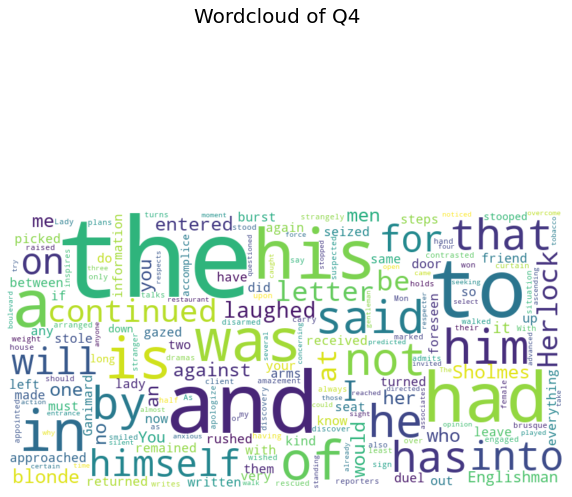

In [442]:
from wordcloud import WordCloud
def word_cloud(char, title):
    f = plt.figure (figsize=(10, 10))
    f.suptitle(title, fontsize=20)
    word_cloud = WordCloud(collocations = False,background_color = 'white', width=800, height=400, max_words=200).generate_from_frequencies(char)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

plot1 = word_cloud(word_dict, 'Wordcloud of Q4')
Q4_list[book_index-1]=word_dict

In [443]:
# Q5:When and how the detective/detectives and the perpetrators co-occur - chapter #, the sentence(s) # in a chapter,
Q5_answer=[]
for d in detective_ent:
    #print(position_d)
    for p in perpetrator_ent:
#         print("\n"+d.name+" and "+p.name)
        pattern = p.name
        for position in d.position:
            sent=sentence_total[position[0]-1][position[1]-1]
            match=re.search(pattern, sent)
            if match:
#                 print(position)
#                 print(sent)
                Q5_answer.append([d.name+" and "+p.name,position])
print(Q5_answer)
Q5_list[book_index-1]=Q5_answer

[['Ganimard and Lupin', [1, 392]], ['Ganimard and Lupin', [1, 756]], ['Ganimard and Lupin', [2, 529]], ['Ganimard and Lupin', [2, 530]], ['Ganimard and Lupin', [2, 532]], ['Ganimard and Lupin', [6, 341]], ['Ganimard and Lupin', [6, 585]], ['Ganimard and Lupin', [6, 600]], ['Herlock and Lupin', [1, 171]], ['Herlock and Lupin', [3, 89]], ['Herlock and Lupin', [3, 276]], ['Herlock and Lupin', [5, 570]], ['Herlock and Lupin', [8, 659]], ['Sholmes and Lupin', [3, 276]], ['Sholmes and Lupin', [4, 314]], ['Sholmes and Lupin', [4, 336]], ['Sholmes and Lupin', [4, 400]], ['Sholmes and Lupin', [4, 430]], ['Sholmes and Lupin', [4, 497]], ['Sholmes and Lupin', [5, 482]], ['Sholmes and Lupin', [5, 499]], ['Sholmes and Lupin', [6, 159]], ['Sholmes and Lupin', [6, 265]], ['Sholmes and Lupin', [6, 318]], ['Sholmes and Lupin', [6, 335]], ['Sholmes and Lupin', [6, 337]], ['Sholmes and Lupin', [7, 659]], ['Sholmes and Lupin', [8, 253]], ['Sholmes and Lupin', [8, 277]], ['Sholmes and Lupin', [8, 694]], ['

In [444]:
# Q6 When are other suspects first introduced - chapter #, the sentence(s) # in a chapter
Q6_answer=[]
for s in suspect_ent:
    print(s.name)
    print(s.position[0])
    Q6_answer.append([s.name,s.position[0]])
Q6_list[book_index-1]=Q6_answer

Clotilde
[4, 232]
Antoinette
[2, 15]
Bleichen
[2, 318]
Madame
[1, 306]
Destange
[4, 164]


In [410]:
print(Q1_list)
print(Q2_list)
print(Q3_list)
# print(Q4_list)
# print(Q5_list)
print(Q6_list)

[None, None, [['Ganimard', [1, 392]], ['Herlock', [1, 165]], ['Sholmes', [2, 564]]], [['Beautrelet', [1, 365]], ['Ganimard', [2, 66]], ['Filleul', [1, 131]]], [['Ganimard', [1, 379]], ['Dudouis', [5, 229]]]]
[None, None, [['Stolen', [1, 57]], ['Abduction', [1, 296]], ['Murder', [2, 40]], ['Framed', [2, 337]]], [['Seize', [4, 312]], ['Fight', [10, 7]], ['Disguise & deceive', [10, 52]]], [['Attack', [4, 112]]]]
[None, None, [['Lupin', [1, 171]]], [['Lupin', [2, 349]], ['ValmÃ©ras', [6, 27]]], [['Lupin', [1, 15]]]]
[None, None, [['Clotilde', [4, 232]], ['Antoinette', [2, 15]], ['Bleichen', [2, 318]], ['Madame', [1, 306]], ['Destange', [4, 164]]], [['BrÃ©doux', [3, 482]]], [['Sparmiento', [10, 43]]]]


In [425]:
#create table
book_name = ['The Extra Ordinary Adventure of Lupin','Arsene Lupin','Lupin vs Herlock Sholmes','The Hollow Needle','The Confession of Lupin']

table_Q1 = {'Book Name':book_name,"investigator":[],'Chapter No.': [],'Sentence No.': []}
for investigator in Q1_list:
    d_list=[]
    c_list=[]
    s_list=[]
    if investigator:
        for d in investigator:
            #print(d[1][1])
            d_list.append(d[0])
            c_list.append("Chapter "+str(d[1][0]))
            s_list.append("Sentence "+str(d[1][1]))
        #print(s_list)
    table_Q1["investigator"].append(d_list)
    table_Q1['Chapter No.'].append(c_list)
    table_Q1['Sentence No.'].append(s_list)


print(table_Q1)
df_dict = pd.DataFrame(table_Q1)
df_dict

{'Book Name': ['The Extra Ordinary Adventure of Lupin', 'Arsene Lupin', 'Lupin vs Herlock Sholmes', 'The Hollow Needle', 'The Confession of Lupin'], 'investigator': [[], [], ['Ganimard', 'Herlock', 'Sholmes'], ['Beautrelet', 'Ganimard', 'Filleul'], ['Ganimard', 'Dudouis']], 'Chapter No.': [[], [], ['Chapter 1', 'Chapter 1', 'Chapter 2'], ['Chapter 1', 'Chapter 2', 'Chapter 1'], ['Chapter 1', 'Chapter 5']], 'Sentence No.': [[], [], ['Sentence 392', 'Sentence 165', 'Sentence 564'], ['Sentence 365', 'Sentence 66', 'Sentence 131'], ['Sentence 379', 'Sentence 229']]}


,Book Name,investigator,Chapter No.,Sentence No.
0,The Extra Ordinary Adventure of Lupin,[],[],[]
1,Arsene Lupin,[],[],[]
2,Lupin vs Herlock Sholmes,"[Ganimard, Herlock, Sholmes]","[Chapter 1, Chapter 1, Chapter 2]","[Sentence 392, Sentence 165, Sentence 564]"
3,The Hollow Needle,"[Beautrelet, Ganimard, Filleul]","[Chapter 1, Chapter 2, Chapter 1]","[Sentence 365, Sentence 66, Sentence 131]"
4,The Confession of Lupin,"[Ganimard, Dudouis]","[Chapter 1, Chapter 5]","[Sentence 379, Sentence 229]"
